# Trabajo final HCC

Leempos nuestro archivo y vemos que datos tenemos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipyvolume as ipv
from ipywidgets import interact, interact_manual, widgets
from scipy.optimize import curve_fit

sns.set_style('whitegrid')

%matplotlib inline

data=pd.read_csv(r'/home/anakin/Documents/HCC/proyecto-HCC/asu1.tsv', sep='|')



In [2]:
data.head(150000)

,X,Y,Z,RAJ2000,DEJ2000,z
0,-0.04896,0.06025,0.08893,129.093602,48.880112,0.118053
1,-0.04927,0.06013,0.08913,129.333969,48.906245,0.118268
2,-0.04945,0.06031,0.08926,129.350815,48.856141,0.118536
3,-0.04775,-0.00249,0.09856,182.990895,64.120498,0.109542
4,-0.04469,-0.00259,0.09177,183.316143,63.997007,0.102103
...,...,...,...,...,...,...
119785,-0.09209,0.02906,0.01642,162.486864,9.651224,0.097955
119786,-0.09187,0.02883,0.01634,162.577575,9.628749,0.097664
119787,-0.08247,0.02693,0.01512,161.916365,9.889721,0.088059
119788,-0.09290,0.03025,0.01698,161.961011,9.860375,0.099168


In [3]:
rs=data['z']

c=299792
H=72
dist=rs*c/H    #rs=dist*H/c    X=x1*H/c cos(del)cos(alf)  x1[Mpc]=X*c/(H*cos(alf)cos(del))
rmax=0.12*c/H
print(dist);

0         491.546458
1         492.441670
2         493.557563
3         456.108545
4         425.134202
             ...    
119785    407.862852
119786    406.651193
119787    366.658107
119788    412.913515
119789    324.416582
Name: z, Length: 119790, dtype: float64


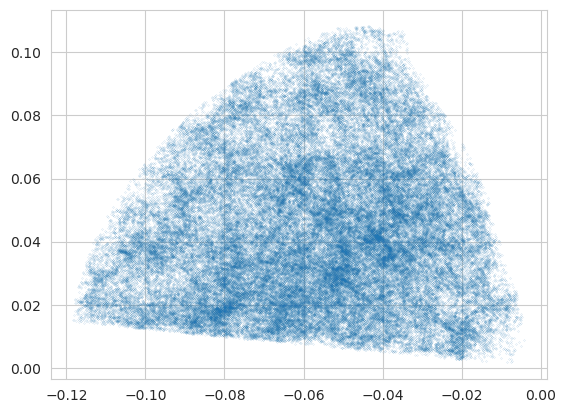

In [4]:
fig, ax=plt.subplots(1,1)

x=data['X']
y=data['Y']
z=data['Z']
alfa=data['RAJ2000']
delta=data['DEJ2000']
plt.scatter(x,z,s=0.005);

#print(x,y,z)

Calculamos la dimension fractal D con una sola esfera centrada en la MW 

In [5]:
#Transformamos los x,y,z a Mpc 



x1=dist*np.cos(alfa)*np.cos(delta)
y1=dist*np.sin(alfa)*np.cos(delta)
z1=dist*np.sin(delta)


modulo=np.sqrt(x1**2+y1**2+z1**2)
print(modulo)

0         491.546458
1         492.441670
2         493.557563
3         456.108545
4         425.134202
             ...    
119785    407.862852
119786    406.651193
119787    366.658107
119788    412.913515
119789    324.416582
Length: 119790, dtype: float64


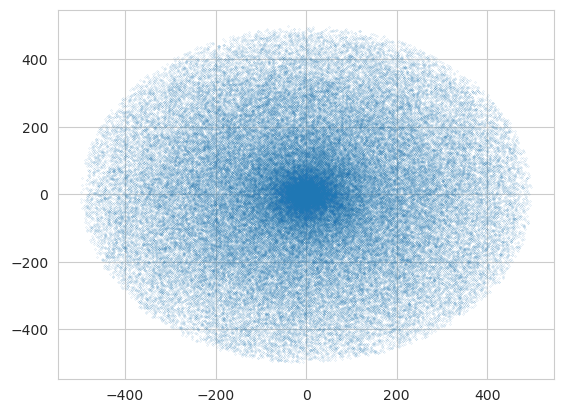

In [6]:
fig, ax=plt.subplots(1,1)

plt.scatter(x1,y1,s=0.005);


In [7]:
#definimos la funcion que cuenta la cantidad de galaxias dentro de una esfera

N=len(dist)

def spheres(x0, y0, z0, radio):
    
    h=0.6767
    d=np.zeros(N)
    gc=0

    for i in range(N):
    
        d[i]=np.sqrt((x1[i]-x0)**2+(y1[i]-y0)**2+(z1[i]-z0)**2)
        
        if (d[i]<=radio/h and d[i]!=0):
        
            gc=gc+1
            
    return gc



In [8]:
#utilizando que el centro de la MW es (0,0,0)
    
rr=np.zeros(96)
c=np.zeros(96)
q=0
for r in range(96):

    MW=spheres(0,0,0,q)
    rr[r]=q
    c[r]=MW
    q=q+2
print(c)


[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 6.0000e+00
 8.0000e+00 1.3000e+01 1.9000e+01 2.5000e+01 3.5000e+01 5.8000e+01
 7.0000e+01 8.4000e+01 1.0600e+02 1.2400e+02 1.5700e+02 1.8700e+02
 2.5400e+02 3.1500e+02 4.0300e+02 5.2000e+02 6.3500e+02 7.3300e+02
 8.4800e+02 9.5100e+02 1.0650e+03 1.1890e+03 1.3370e+03 1.4800e+03
 1.6300e+03 1.7970e+03 1.9860e+03 2.1920e+03 2.4250e+03 2.6130e+03
 2.8230e+03 3.0490e+03 3.2520e+03 3.4610e+03 3.6700e+03 3.8970e+03
 4.0750e+03 4.2480e+03 4.4370e+03 4.6270e+03 4.8740e+03 5.0940e+03
 5.3190e+03 5.5790e+03 5.8220e+03 6.1530e+03 6.5130e+03 6.8560e+03
 7.2140e+03 7.5310e+03 7.8370e+03 8.1330e+03 8.4480e+03 8.8410e+03
 9.2190e+03 9.6280e+03 1.0050e+04 1.0493e+04 1.0942e+04 1.1336e+04
 1.1753e+04 1.2101e+04 1.2451e+04 1.2835e+04 1.3189e+04 1.3596e+04
 1.4061e+04 1.4603e+04 1.5192e+04 1.5824e+04 1.6434e+04 1.7150

graficamos la cantidad de galaxias vs r[Mpc] y fiteamos los puntos para calcular los parametros a y D, utilizando una ley de potencias, $N(r)=a.r^D$

[2.54586939e-03 3.03684068e+00]
[[ 7.14792567e-08 -5.48928411e-06]
 [-5.48928411e-06  4.21874616e-04]]


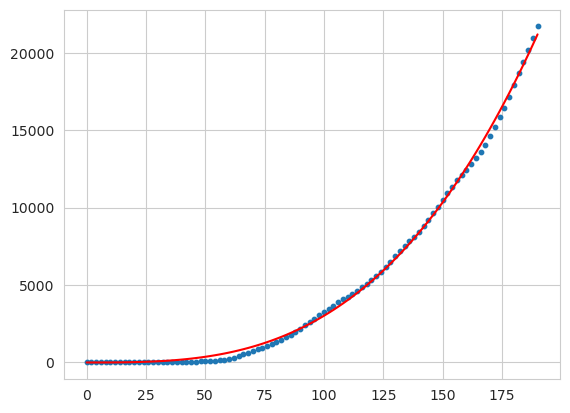

In [9]:
fig, ax=plt.subplots(1,1)
    
def funcion (x,a,b):

    return a*x**b

res,cov =curve_fit(funcion, rr, c)
ax.plot(rr, funcion(rr, 2.54586939e-03 ,3.0368),color='red')
plt.scatter(rr, c, s=10)
print(res)
print(cov);

Ahora vamos a tomar 100 galaxias al azar, lejos del borde, como galaxias centrales para generar las esferas.

Ahora vamos a calcular la dimensión fractal utilizando otro metodo. 

La dimension esta dada por $D_{2}(r)= \frac{Log C_{2}(r+1)-Log C_{2}(r)}{Log(r+1)-Log(r)}$

Donde $C_{2}(r)=\frac{1}{NM} \sum_{i=1}^{M}n_{i}(r)$

N es el numero total de galaxias de la muestra, M es el numero de galaxias centrales para las esferas y $n_{i}$ es el numero de galaxias contadas dentro de la i-ésima esfera.

In [21]:
tabla= open('GalaxiasCentrales.tsv', 'w')
print('Xc|Yc|Zc', file=tabla)
i = 0
j = 0
while i < 119790:
    if j < 10:
        if dist[i] < 150:
            print('{:7.3f} {:1s} {:7.3f} {:1s} {:7.3f}'.format(x1[i],'|',y1[i],'|',z1[i]), file=tabla)
            i = i + 2000
            j = j + 1
    i = i + 1
    
    
tabla.close()

In [22]:
GalCent=pd.read_csv(r'/home/anakin/Documents/HCC/proyecto-HCC/GalaxiasCentrales.tsv', sep='|')

Xc=GalCent['Xc']
Yc=GalCent['Yc']
Zc=GalCent['Zc']

#print(Xc,Yc,Zc);

N=119790
M=10

tabla2=open('n_i_r.tsv', 'w')


for i in range(2):
    c=np.zeros(96)
    q=0

    for r in range(96):

        galax=spheres(Xc[i],Yc[i],Zc[i],q)
        #g1=spheres(Xc[i],Yc[i],Zc[i],q+2)
        
        
        
        
        c[r]=galax
        #c2[r]=(1/(N*M))*c[r]
        #c2_1=(1/(N*M))*g1
        
        #D2[r]=(np.log10(c2_1)-np.log10(c2[r]))/(np.log(q+2)-np.log10(q))
        
        q=q+2
        
        
    
    print('#galaxia=',i ,c,'---------------------------------------------', file=tabla2)
tabla2.close()

In [42]:
q=0
tabla2=open('n_i_r.tsv', 'w')
print('radio','|','ni',file=tabla2)
suma=np.zeros(96)
for r in range(96):
    aux=0
    for i in range(10):
        
        c=np.zeros(10)
    
        galax=spheres(Xc[i],Yc[i],Zc[i],q)
        
        c[i]=galax
        
        aux= aux + c[i]
        
    suma[r]=aux
    
    print('{:3d} {:1s} {:7.1f}'.format(q,'|',suma[r]),file=tabla2)

    q=q+2
        
    
    
tabla2.close()
